In [22]:
import sys, os
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files'))


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import crab_fits

from chainconsumer import ChainConsumer
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [2]:
base_path = "/home/tguethle/Documents/spi/Master_Thesis/"
fits_2003 = [base_path+config["fit_path"] for config in crab_fits.config_low_e_break_2003]
fits_2017 = [base_path+config["fit_path"] for config in crab_fits.config_low_e_break_2017]

In [3]:
vals_2003 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2003])
vals_2017 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2017])

err_2003 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2003])
err_2017 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2017])
err_2003.shape

(4, 6)

In [4]:
vals_2003

array([[ 7.80391852e-04,  4.64220265e+01, -1.96675306e+00,
        -2.13634482e+00,  2.55571409e-08, -4.06573274e-01],
       [ 1.44692631e-03,  3.49071555e+01, -1.40009864e+00,
        -2.10960883e+00,  1.84212751e-08, -2.39182686e+00],
       [ 1.34450000e-03,  3.89543433e+01, -1.40549227e+00,
        -2.11903848e+00,  1.93095231e-08, -3.41872146e+00],
       [ 1.06723970e-03,  5.45243979e+01, -1.40086602e+00,
        -2.14192216e+00,  2.58071049e-08, -9.39511039e-01]])

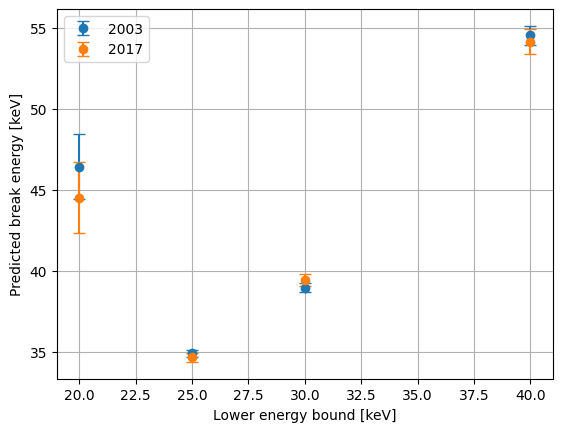

In [23]:
%matplotlib inline
fig, ax = plt.subplots()

# ax.scatter((20,25,30,40), vals_2003[:,1], label="2003")
# ax.scatter((20,25,30,40), vals_2017[:,1], label="2017")

ax.set_xlabel("Lower energy bound [keV]")
ax.set_ylabel("Predicted break energy [keV]")

ax.grid()

ax.errorbar((20,25,30,40), vals_2003[:,1], yerr=err_2003[:,1], fmt='o', capsize=4, label="2003")
ax.errorbar((20,25,30,40), vals_2017[:,1], yerr=err_2017[:,1], fmt='o', capsize=4, label="2017")

ax.legend(loc="upper left")


In [31]:
cc_2003 = ChainConsumer()
cc_2017 = ChainConsumer()

for n,fit in enumerate(fits_2003[0:]):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    cc_2003.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=fit.split("/")[-1])


for n,fit in enumerate(fits_2017[0:]):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    cc_2017.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=fit.split("/")[-1])

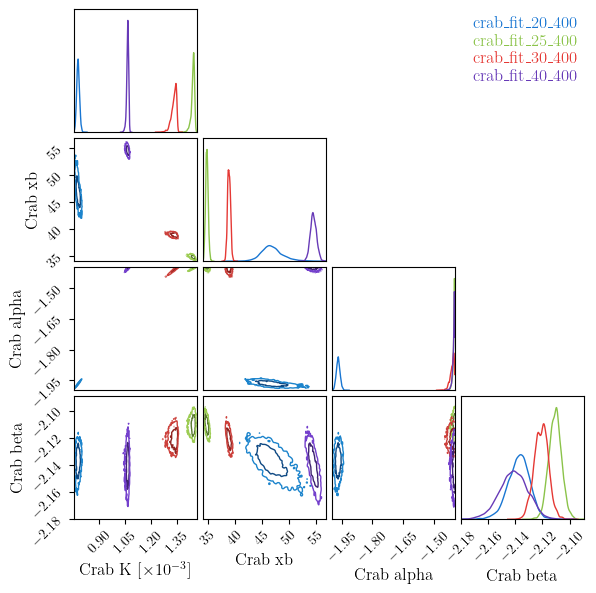

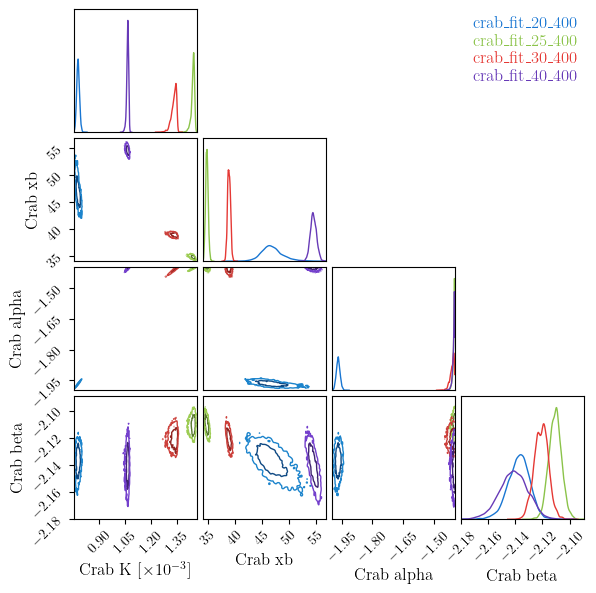

In [32]:
cc_2003.plotter.plot(parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"])

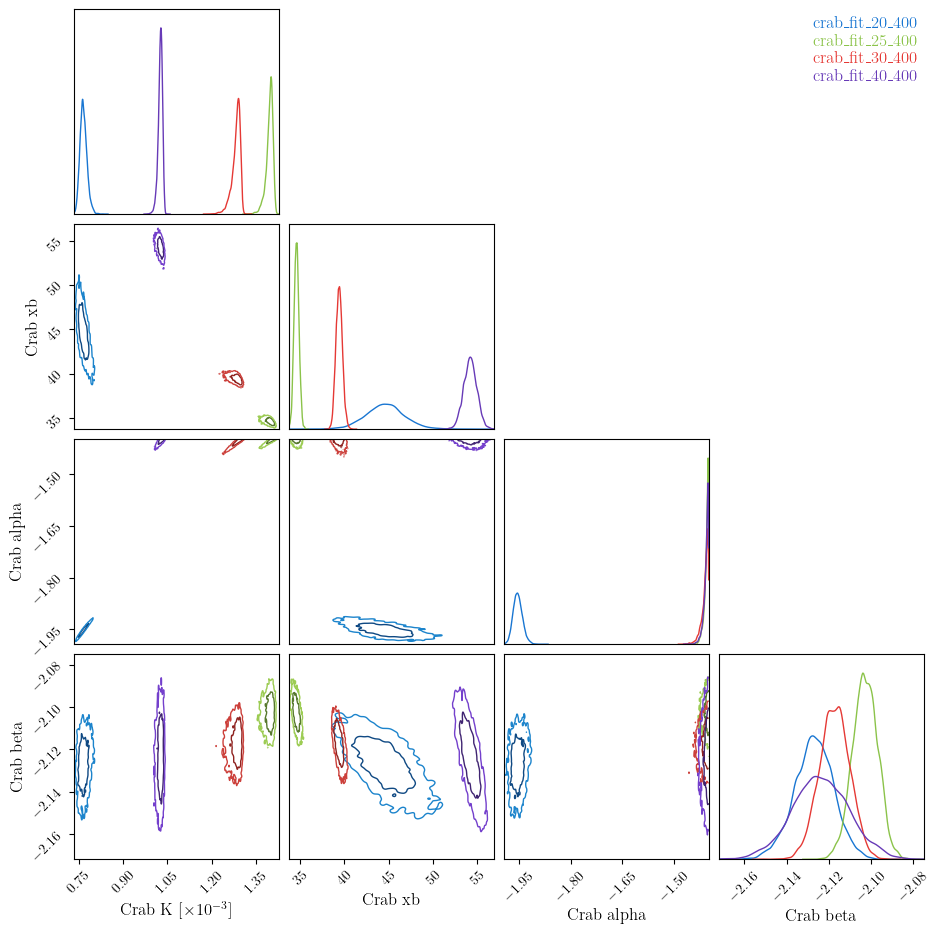

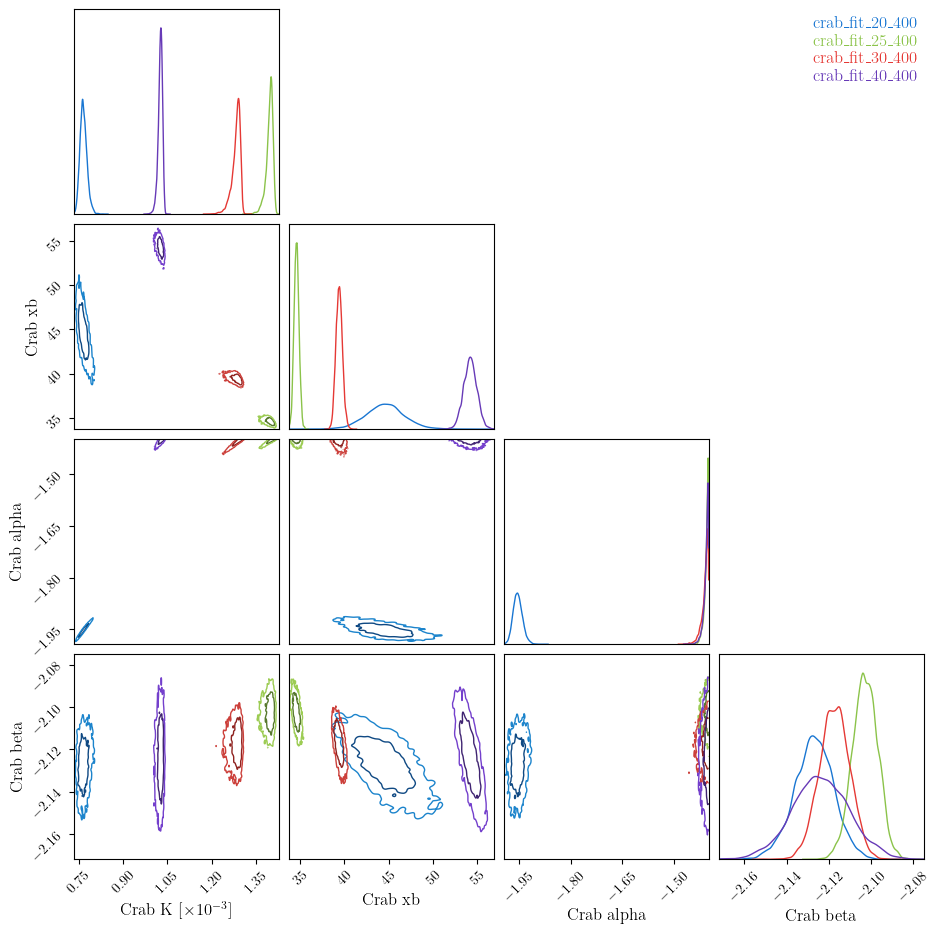

In [33]:
cc_2017.plotter.plot(figsize="PAGE", parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"], legend=True)

$$f(x)= K~\begin{cases}\left( \frac{x}{x_{b}} \right)^{\alpha} & x < x_{b} \\ \left( \frac{x}{x_{b}} \right)^{\beta} & x \ge x_{b} \end{cases}$$